## Armen Khachatrian
### 10/27/2019
### Machine Learning: 1st session

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
from IPython.display import Image

**Information about Data Set:**
The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan

available at: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set#

Attribute Information:

*The inputs are as follows*

1. Date = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

2. AgH = the house age (unit: year) 

3. MRT=the distance to the nearest MRT station (unit: meter) 

4. Stor=the number of convenience stores in the living circle on foot (integer)

5. LAT=the geographic coordinate, latitude. (unit: degree) 

6. LONG=the geographic coordinate, longitude. (unit: degree) 

*The output is as follow*

7. Price = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

In [2]:
import pandas as pd

df = pd.read_excel('Real_estate_valuation_data_set.xlsx',
                   sep='\s+')

df.columns = ['Num','Date', 'AgH', 'MRT', 'Stor', 
              'LAT', 'LONG', 'Price']
del df['Num'] # I deleted this feature as, to my mind, it is unnecessary. However, later I rerun regression by using this parameter
df.head()

,Date,AgH,MRT,Stor,LAT,LONG,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


EDA

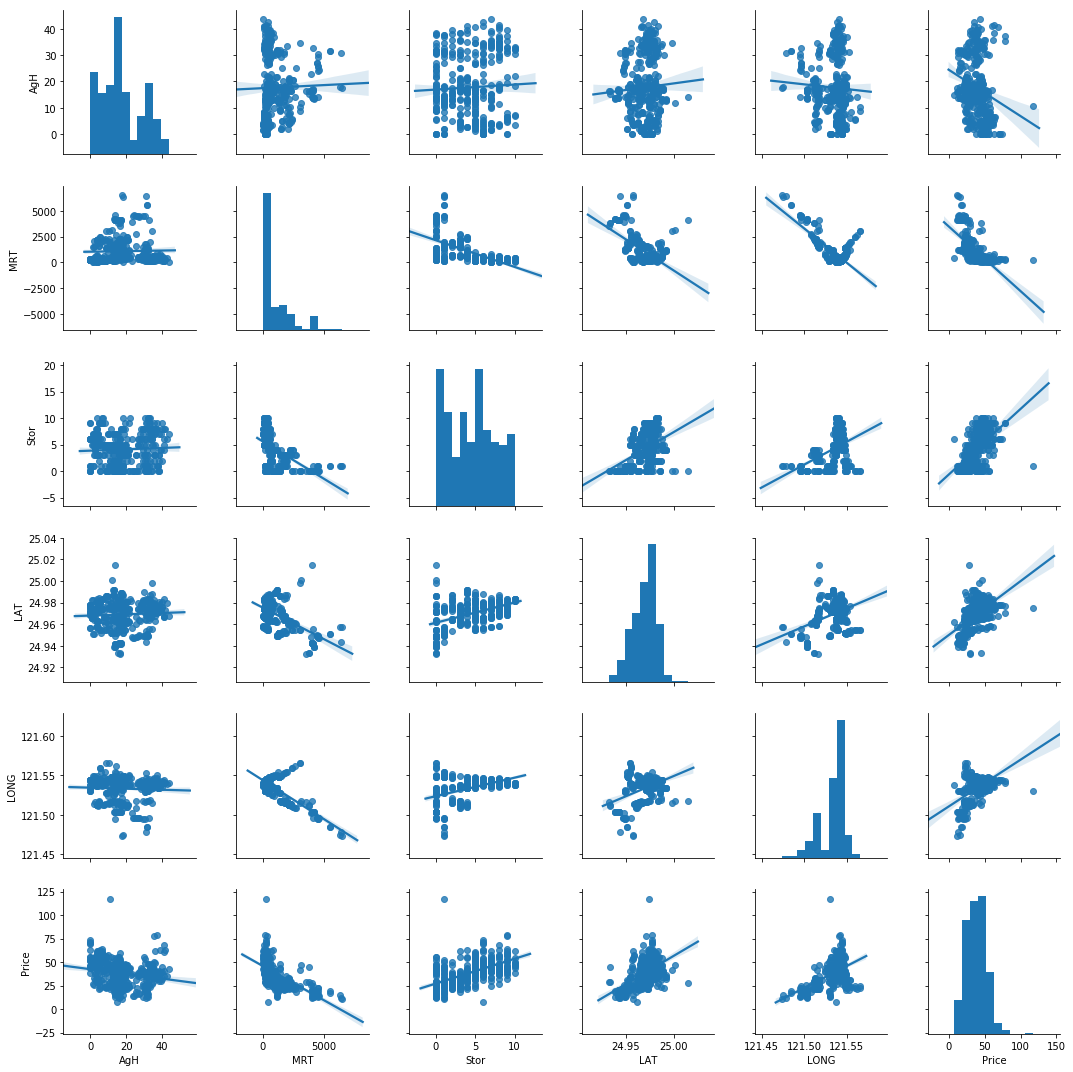

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['AgH', 'MRT', 'Stor', 'LAT', 'LONG', 'Price']

sns.pairplot(df[cols], height=2.5, kind ='reg')
plt.tight_layout()
plt.show()

**Note :** Most of features look to be linear. I built relationships between all features. Moreover, it is easy to look at all features due to a small number of them.

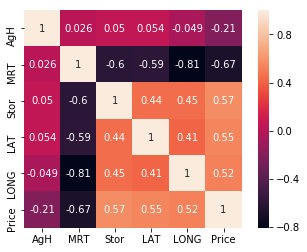

In [4]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 annot=True,
                 square=True,
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

**Note :** Correlation between our Xs and relation to our desired output.

In [5]:
search = pd.DataFrame.duplicated(df)
for i in range(len(df)):
    if search[i] == True:
        print('Duplicated rows exist')
        break
else:
    print('No duplicated rows in the data')

No duplicated rows in the data


**Note :** I also checked the presence of possible dublicated rows

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
y = df['Price'].values #our target(output)

In [8]:
del df['Price']
X = df.values #adjusting our DataFrame by cutting output values

**Note :** the method “Least Squares” (OLS) means that we’re trying to fit a regression line that would minimize the square of distance from the regression line

In [9]:
import statsmodels.api as sm

X = df["LAT"] #This parameter looks well-correlated with the output

model = sm.OLS(y, X).fit() 
predictions = model.predict(X) # make the predictions by the model

model.summary() # Print out the statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              3231.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   2.20e-197
Time:                        15:55:27   Log-Likelihood:                         -1667.4
No. Observations:                 414   AIC:                                      3337.
Df Residuals:                     413   BIC:                                      3341.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LAT            1.5212      0.027     56.844      0.000       1.469       1.574
==============================================================================
Omnibus:                       46.694   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.326
Skew:                           0.600   Prob(JB):                     2.22e-23
Kurtosis:                       5.146   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note :** The coefficient of 1.5212 means that as the "LAT" variable increases by 1, the predicted value of housing price increases by 1.5212. 

**Note :** A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the "LAT" (meaning we predict at a 95% percent confidence that the value of "LAT" is between 1.469 to 1.574).

**Note :** Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

In [10]:
X = sm.add_constant(X) # let's add an intercept (beta_0) to our model (i.e constant 1)

model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.39e-33
Time:                        15:55:41   Log-Likelihood:                -1594.3
No. Observations:                 414   AIC:                             3193.
Df Residuals:                     412   BIC:                             3201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.492e+04   1129.665    -13.205      0.000   -1.71e+04   -1.27e+04
LAT          598.9683     45.243     13.239      0.000     510.033     687.904
==============================================================================
Omnibus:                      116.094   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.595
Skew:                           1.158   Prob(JB):                    4.42e-110
Kurtosis:                       7.881   Cond. No.                     5.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note :** With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -1.492e+04. We also changed the slope of the LAT predictor from 1.52 to 598.97.

In [11]:
X = df[["Date", "AgH", "MRT", "Stor", "LAT", "LONG"]] #Using all features to predict our output
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1351.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   1.33e-265
Time:                        15:56:12   Log-Likelihood:                         -1489.3
No. Observations:                 414   AIC:                                      2991.
Df Residuals:                     408   BIC:                                      3015.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Date           3.7426      1.416      2.643      0.009       0.959       6.527
AgH           -0.2708      0.039     -6.999      0.000      -0.347      -0.195
MRT           -0.0055      0.001    -10.122      0.000      -0.007      -0.004
Stor           1.1291      0.189      5.975      0.000       0.758       1.501
LAT          203.3009     43.523      4.671      0.000     117.744     288.858
LONG        -103.4005     23.309     -4.436      0.000    -149.222     -57.579
==============================================================================
Omnibus:                      223.787   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3262.227
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      16.185   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note :** 

1. We can see here that this model has a much higher R-squared value — 0.952, meaning that this model explains 95.2% of the variance in our dependent variable. Whenever we add variables to a regression model, R squared will be higher, but this value is high enough. 

2. We can see that both LAT (latitude) and LONG (longitude) are statistically crucial in predicting house price of unit area (not surprisingly , we see that as latitude increases by 1, Price will increase by 203.3 and when longitude increases by 1, price will decrease by -103.4. 

*REMARK :* Intuitively, we can figure out that location of house has a great impact on its price

### Data split

**Note :** Now we will split our data into two parts: training and testing. Split will be 80/20

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #train_test_split() is split data function
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 6) (331,)
(83, 6) (83,)


In [13]:
lm = LinearRegression()
model = lm.fit(X_train, y_train) #fit() function fits a linear model
predictions = lm.predict(X_test) #we want to use the model to make predictions

Text(0, 0.5, 'Predictions')

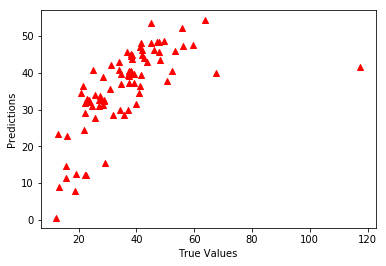

In [14]:
plt.scatter(y_test, predictions, marker='^', color='red') 
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [15]:
model.score(X_test, y_test)#our score (R squared of our model)

0.4234314798394322

In [16]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, predictions)

127.55547313787446

In [17]:
lm.coef_#our betas

array([ 4.41657222e+00, -2.93992723e-01, -3.84089069e-03,  1.19748873e+00,
        2.38994471e+02,  5.02877947e+01])

***Conclusion :**
1. The low rate of R squared could be caused by not correct spliting data (For instance, split 60/40 gives us higher score (R squared) and also due to the small sample (Curse of dimensionality). To obtain higher accuracy we need more observations. (Usually peopel use 80/20 and 70/30 split, that is why, split 60/40 looks weird )
2. It also could be the underfitting problem, but underfitting occurs when we try to find linear dependence of variables but there is no linearity there. I don't think that it is this case.  

Appendix for Conclusion

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) #train_test_split() is split data function
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(248, 6) (248,)
(166, 6) (166,)


In [35]:
lm = LinearRegression()
model = lm.fit(X_train, y_train) #fit() function fits a linear model
predictions = lm.predict(X_test)

In [36]:
model.score(X_test, y_test)

0.657999511852292